In [1]:
import pandas as pd

In [2]:
cement = pd.read_csv('concrete.csv')

In [3]:
cement.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


<AxesSubplot:xlabel='cement', ylabel='strength'>

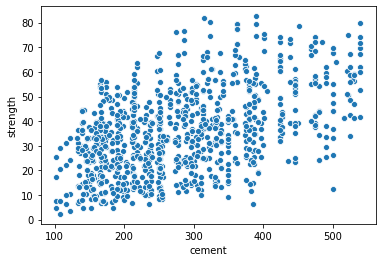

In [4]:
import seaborn as sns
sns.scatterplot(x = cement['cement'], y = cement['strength'])

In [5]:
d = cement.corr()
print(d)

                cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275216 -0.397467 -0.081587      0.092386  -0.109349   
slag         -0.275216  1.000000 -0.323580  0.107252      0.043270  -0.283999   
ash          -0.397467 -0.323580  1.000000 -0.256984      0.377503  -0.009961   
water        -0.081587  0.107252 -0.256984  1.000000     -0.657533  -0.182294   
superplastic  0.092386  0.043270  0.377503 -0.657533      1.000000  -0.265999   
coarseagg    -0.109349 -0.283999 -0.009961 -0.182294     -0.265999   1.000000   
fineagg      -0.222718 -0.281603  0.079108 -0.450661      0.222691  -0.178481   
age           0.081946 -0.044246 -0.154371  0.277618     -0.192700  -0.003016   
strength      0.497832  0.134829 -0.105755 -0.289633      0.366079  -0.164935   

               fineagg       age  strength  
cement       -0.222718  0.081946  0.497832  
slag         -0.281603 -0.044246  0.134829  
ash           0.079108 -0.154371 -0.105755  
water    

<AxesSubplot:xlabel='cement', ylabel='strength'>

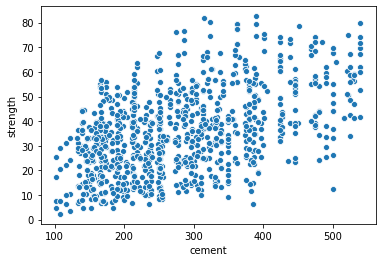

In [8]:
import seaborn as sns
sns.scatterplot(x = cement['cement'], y = cement['strength'])

In [15]:
#Selection of Input Parameters
X = cement.iloc[:,:8]
print(X.head())
y = cement['strength']
print(y.head())

   cement   slag    ash  water  superplastic  coarseagg  fineagg  age
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28
0    29.89
1    23.51
2    29.22
3    45.85
4    18.29
Name: strength, dtype: float64


In [6]:
#from sklearn import decomposition
#pca = decomposition.PCA(n_components=4)
#pca.fit(X)
#X_p = pca.transform(X)

In [8]:
print(X_p)

[[-146.32987247  132.4884779   -22.22257169  -51.58197919]
 [-119.06396993  -93.6524556   -86.72465396  -13.02613064]
 [ -38.6975629  -107.56144937   55.18327314    6.86177732]
 ...
 [ -23.69748434   51.20898678   77.70400256   66.05860307]
 [ 121.91737539   67.35918243  -51.21928211   71.15351571]
 [ 295.25735152   -5.91024785 -171.50261421  -25.45001199]]


In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(824, 8)
(206, 8)
(824,)
(206,)


In [23]:
#from sklearn import linear_model
#regr = linear_model.LinearRegression()
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor()

In [24]:
#Training
regr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [25]:
# The coefficients & Intercept 
print('Coefficients', regr.coef_)
print('Intercept',regr.intercept_)

AttributeError: 'DecisionTreeRegressor' object has no attribute 'coef_'

In [26]:
#Testing
y_pred = regr.predict(X_test)

In [27]:
y_pred

array([ 9.99      , 31.35      , 33.8       , 40.93      , 39.        ,
       48.79      , 43.01      , 51.43      , 33.4       , 33.4       ,
       17.96      ,  4.78      , 19.99      , 56.14      , 39.44      ,
       28.02      , 60.32      , 39.84      , 40.56      , 33.        ,
       11.36      , 33.3       , 13.09      , 51.73      , 35.86      ,
       13.66      , 28.02      , 52.45      , 66.1       , 69.66      ,
       19.11      , 15.82      , 15.09      , 60.2       , 46.25      ,
       14.6       , 61.23      , 35.34      , 42.29      , 26.23      ,
       37.44      , 44.9       , 13.33      , 36.44      , 32.04      ,
       17.58      , 50.73      , 28.24      , 71.3       , 61.09      ,
       65.7       , 35.34      , 32.33      , 52.2       , 46.23      ,
       28.63      , 50.82333333, 46.64      , 17.6       , 55.51      ,
       44.87      , 23.22      , 33.73      , 41.89      , 25.22      ,
       17.28      , 29.55      , 26.06      , 40.68      , 31.45

In [28]:
#Evaluation
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred)) #Coefficient of Determination
print(mean_squared_error(y_test,y_pred))

0.8744385432408226
32.33808403451996


<AxesSubplot:>

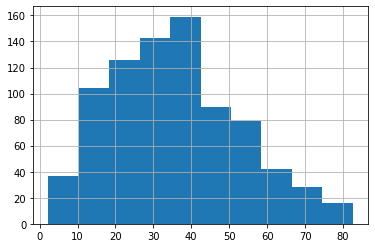

In [41]:
y_train.hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

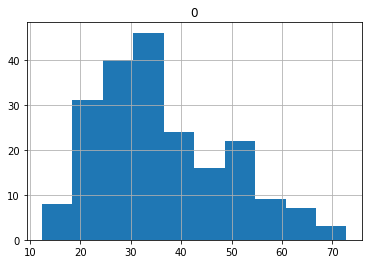

In [42]:
pd.DataFrame(y_pred).hist()

<AxesSubplot:>

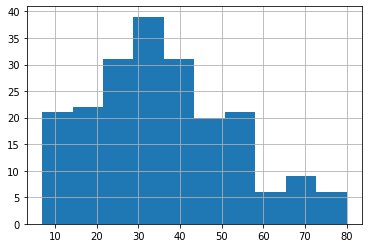

In [43]:
y_test.hist()

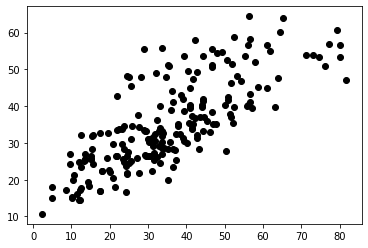

In [59]:
import matplotlib.pyplot as plt
# Plot outputs
plt.scatter(y_test, y_pred,  color='black')